# Exploratory Data Analysis

## 1.0 Objective

The goal fo this notebook is to take the cleaned diabetes data set and explore the relationships between the features and understand how the features compare to the response variable.

## 2.0 Imports

In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from matplotlib.patches import Patch

## 3.0 Loading Data

The data that we cleaned from an earlier notebook is imported. Both the 'discharge_disposition_id' and 'admission_source_id' columns have lots of different values. Therefore I grouped them into more general categories. This new data frame will be used in this notebook.

In [81]:
#importing data frame
#dropped irrelevant columns

df = pd.read_csv('diabetic_data_cleaned', index_col=0)
df.drop(columns=['encounter_id','patient_nbr'], inplace=True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Emergency,Discharged to home,Physician Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [82]:
#display values from the 'discharge_disposition_id' column
df['discharge_disposition_id'].value_counts()

Discharged to home                                                                                           64784
Discharged/transferred to SNF                                                                                13924
Discharged/transferred to home with home health service                                                      12897
Discharged/transferred to another short term hospital                                                         2125
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1990
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1182
Discharged/transferred to ICF                                                                                  810
Left AMA                                                                        

In [83]:
#create a dictionary which assigns each value to a more simplified group
discharge_disposition_grouped = {'Discharged to home':'Home', 
                                 'Discharged/transferred to SNF': 'Other Healthcare Facility',
                                 'Discharged/transferred to home with home health service':'Home',
                                 'Discharged/transferred to another short term hospital':'Hospital',
                                 'Discharged/transferred to another rehab fac including rehab units of a hospital .':'Other Healthcare Facility',
                                 'Expired':'Patient Death',
                                 'Discharged/transferred to another type of inpatient care institution':'Other Healthcare Facility',
                                 'Discharged/transferred to ICF':'Other Healthcare Facility',
                                 'Discharged/transferred to a long term care hospital.':'Other Healthcare Facility',
                                 'Hospice / home':'Home',
                                 'Hospice / medical facility':'Other Healthcare Facility',
                                 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital':'Other Healthcare Facility',
                                 'Discharged/transferred to home under care of Home IV provider':'Home',
                                 'Discharged/transferred within this institution to Medicare approved swing bed':'Hospital',
                                 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.':'Other Healthcare Facility',
                                 'Admitted as an inpatient to this hospital':'Hospital',
                                 'Discharged/transferred/referred to this institution for outpatient services':'Other Healthcare Facility',
                                 'Discharged/transferred/referred another institution for outpatient services':'Other Healthcare Facility',
                                 'Expired at home. Medicaid only, hospice.':'Patient Death',
                                 'Neonate discharged to another hospital for neonatal aftercare':'Hospital',
                                 'Discharged/transferred to a federal health care facility.':'Other Healthcare Facility',
                                 'Still patient or expected to return for outpatient services':'Other Healthcare Facility',
                                 'Expired in a medical facility. Medicaid only, hospice.':'Patient Death'}

In [84]:
#uses the dictionary generated above to replace values in the 'discharge_dispositon_id' column
df['discharge_disposition_id'] =  df['discharge_disposition_id'].astype(str).replace(discharge_disposition_grouped)

In [85]:
#display values from the 'admission_source_id' column
df['admission_source_id'].value_counts()

 Emergency Room                                               64528
 Physician Referral                                           29509
Transfer from a hospital                                       3179
 Transfer from another health care facility                    2180
Clinic Referral                                                1104
 Transfer from a Skilled Nursing Facility (SNF)                 854
HMO Referral                                                    186
 Court/Law Enforcement                                           16
 Transfer from hospital inpt/same fac reslt in a sep claim       12
 Transfer from critial access hospital                            8
 Extramural Birth                                                 2
 Transfer from Ambulatory Surgery Center                          2
Normal Delivery                                                   2
 Sick Baby                                                        1
Name: admission_source_id, dtype: int64

In [86]:
#create a dictionary which assigns each value to a more simplified group
admission_source_grouped = {' Physician Referral':'External Referral',
                            'Transfer from a hospital':'Hospital Transfer',
                            ' Transfer from another health care facility':'Healthcare Facility Transfer',
                            'Clinic Referral':'Internal Referral',
                            ' Transfer from a Skilled Nursing Facility (SNF)':'Healthcare Facility Transfer',
                            'HMO Referral':'External Referral',
                            ' Transfer from hospital inpt/same fac reslt in a sep claim':'Hospital Transfer',
                            ' Transfer from critial access hospital':'Hospital Transfer',
                            ' Transfer from Ambulatory Surgery Center':'Healthcare Facility Transfer'}

In [87]:
#uses the dictionary generated above to replace values in the 'admission_source_id' column
df['admission_source_id'] =  df['admission_source_id'].astype(str).replace(admission_source_grouped)

In [88]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Emergency,Home,External Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Home,Emergency Room,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Home,Emergency Room,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Home,Emergency Room,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Home,Emergency Room,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# 4.0 Pearson Correlations

In this section we use the pearson correlation coefficient and a heat map to examine any correlations between features in the data set.

In [89]:
#copying the original df to work with in this section
df_copy = df.copy()

In [90]:
df_copy.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

When examining the pearson coefficients, we see the following noticeable correlations:

- time_in_hospital and num_medications
- num_procedures and num_medications
- time_in_hospital and num_lab_procedures
- change and diabetesMed



What is most noticeable from this data evaluation is that no feature independently had a strong correlation with the response variable (readmission).

In [91]:
# for the categorical columns, the LabelEncoder() creates dummy variables for each category in the column
# a correlation matrix is generated for the data frame that now has all numerical columns
le = preprocessing.LabelEncoder()
for x in df_copy.columns:
    if df_copy[x].dtypes=='object':
       df_copy[x]=le.fit_transform(df_copy[x].astype(str))
corr = df_copy.corr()
corr

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,1.000000,0.066407,0.121179,0.038258,0.033351,0.029755,-0.019860,-0.017445,0.025334,0.025693,...,-0.001260,-0.007346,0.010864,0.003571,0.000990,0.011053,0.000990,-0.014976,0.008585,0.014783
gender,0.066407,1.000000,-0.050365,-0.002577,-0.064021,0.006447,-0.029969,-0.003079,0.060029,-0.022089,...,0.007281,0.003471,0.004042,0.006958,-0.002910,0.004783,-0.002910,-0.015016,0.015902,0.014592
age,0.121179,-0.050365,1.000000,0.011815,0.284715,-0.027023,0.107507,0.020719,-0.030161,0.041947,...,0.005208,-0.023199,-0.001290,0.002045,-0.000190,0.002515,-0.000190,0.035837,-0.022656,-0.030003
admission_type_id,0.038258,-0.002577,0.011815,1.000000,0.004627,0.098008,0.033934,0.011607,-0.012208,-0.093999,...,-0.001995,0.024113,-0.008511,-0.005132,-0.000866,-0.002932,-0.003280,-0.003210,0.014332,-0.012795
discharge_disposition_id,0.033351,-0.064021,0.284715,0.004627,1.000000,-0.049775,0.204366,0.072883,-0.038463,0.120461,...,-0.003228,0.030648,-0.002203,-0.002480,-0.001657,-0.002344,0.005905,-0.024225,0.003872,-0.012964
admission_source_id,0.029755,0.006447,-0.027023,0.098008,-0.049775,1.000000,0.035524,-0.158482,0.207766,0.093808,...,-0.000511,0.007284,0.004811,-0.003561,-0.002285,0.000744,0.003338,0.021559,-0.000907,0.071683
time_in_hospital,-0.019860,-0.029969,0.107507,0.033934,0.204366,0.035524,1.000000,0.318669,0.191470,0.466158,...,-0.003224,0.045882,-0.003459,-0.000630,-0.002519,-0.000590,0.001685,-0.109202,0.062496,-0.057613
num_lab_procedures,-0.017445,-0.003079,0.020719,0.011607,0.072883,-0.158482,0.318669,1.000000,0.058187,0.268169,...,-0.000466,0.035369,-0.009974,-0.007529,-0.000813,0.001218,-0.003204,-0.063951,0.032998,-0.037902
num_procedures,0.025334,0.060029,-0.030161,-0.012208,-0.038463,0.207766,0.191470,0.058187,1.000000,0.385876,...,0.002097,0.009054,-0.000742,-0.005316,-0.002465,0.004316,-0.000626,-0.004521,-0.006775,0.038475
num_medications,0.025693,-0.022089,0.041947,-0.093999,0.120461,0.093808,0.466158,0.268169,0.385876,1.000000,...,-0.003225,0.077090,0.008901,0.003493,-0.003485,0.007899,0.001533,-0.246753,0.186841,-0.051381


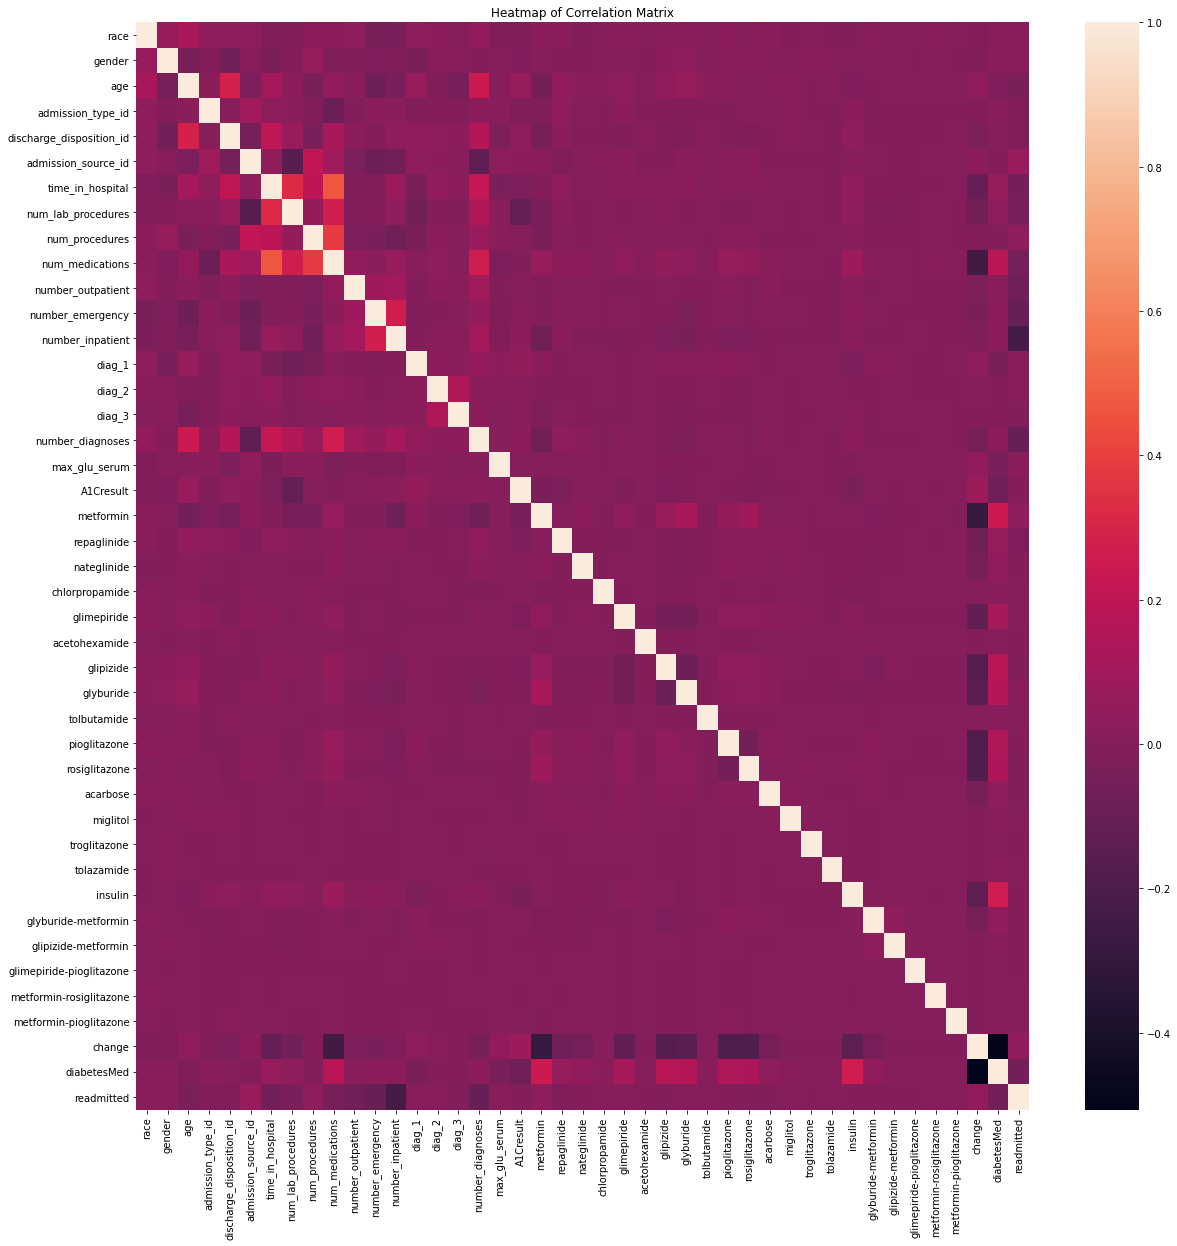

In [92]:
#generating a heat map using the correlation matrix from above
plt_1 = plt.figure(figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.show();

In [114]:
#displaying the pairs of features who have a strong correlation (either positive or negative)
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.3) & (abs(sorted_pairs)<1)]
print (strong_pairs)

change              diabetesMed          -0.506535
diabetesMed         change               -0.506535
num_lab_procedures  time_in_hospital      0.318669
time_in_hospital    num_lab_procedures    0.318669
num_medications     num_procedures        0.385876
num_procedures      num_medications       0.385876
num_medications     time_in_hospital      0.466158
time_in_hospital    num_medications       0.466158
dtype: float64


# 5.0 Data Visualization

In this section we use visuals to learn more about the data set and relationships that exist within it.

## 5.1 Number of Procedures vs. Number Medications

From the heatmap we saw that there was a positive correlation between number of procedures and number of medications. I then wanted to see how our target variable related to these features.

The box plot shows that patients that were readmitted in less than 30 days more medications, regardless of the increase in procedures.

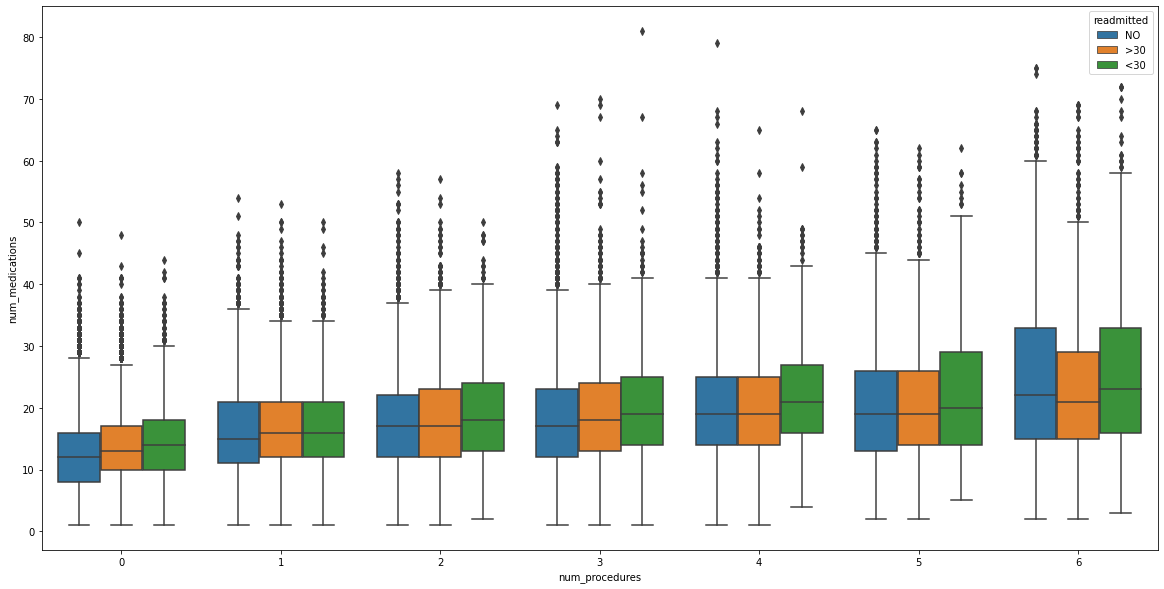

In [115]:
plt_2 = plt.figure(figsize=(20, 10))
sns.boxplot(x="num_procedures", y="num_medications", hue="readmitted", data=df);

## 5.2 Time in Hospital vs. Number Medications

From the heatmap we saw that there was a positive correlation between time in hospital and number of medications. I then wanted to see how our target variable related to these features.

The box plot confirms this correlation. There was no noticeable relationship to the target variable

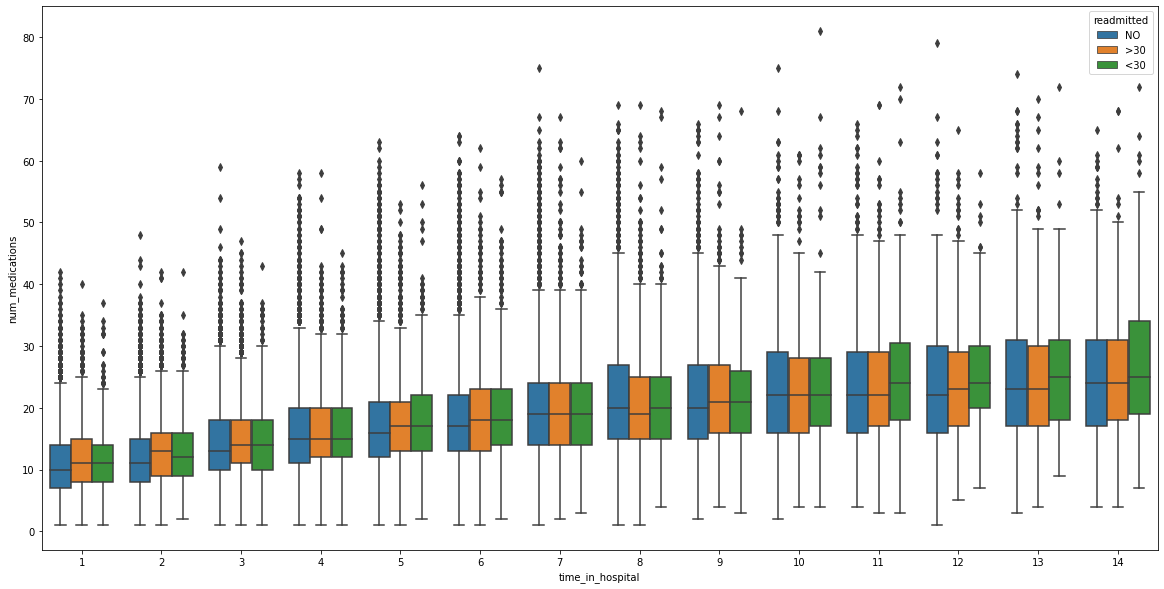

In [116]:
plt_3 = plt.figure(figsize=(20, 10))
sns.boxplot(x="time_in_hospital", y="num_medications", hue="readmitted", data=df);

## 5.3 Time in Hospital vs. Number of Lab Procedures

From the heatmap we saw that there was a positive correlation between time in hospital and number of lab procedures. I then wanted to see how our target variable related to these features.

The box plot confirms this correlation. It is interesting to notice that the number of lab procedures seems to remanin constant for time in hospital > 9 days, regardless of readmission status.

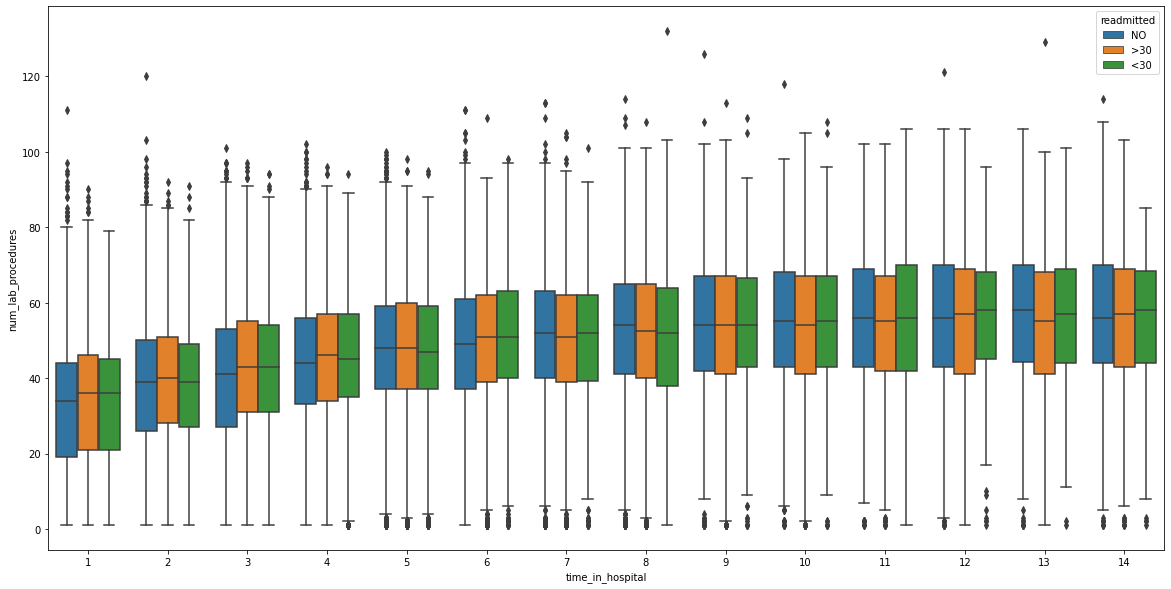

In [117]:
plt_4 = plt.figure(figsize=(20, 10))
sns.boxplot(x="time_in_hospital", y="num_lab_procedures", hue="readmitted", data=df);

## 5.4 Age vs. Discharge Disposition ID vs. Readmission

The stacked bar graph below shows how age affects where the patient is discharged. 

A majority of patients are discharged home. Although as age increases, the proportion of those who are sent to another healthcare facility increases. This could be because older patients need more assistance and are not able to care for themselves at home.

Age and discharge disposition would be good features to use in the modelling of this data.

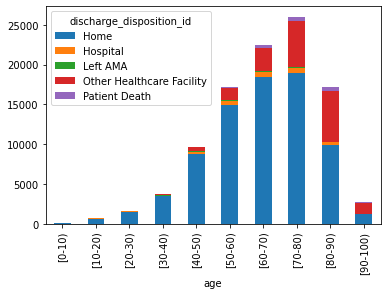

In [119]:
clarity_color_table = pd.crosstab(index=df["age"], columns=df["discharge_disposition_id"])

clarity_color_table.plot(kind="bar", stacked=True);

The graph below shows the spread of the data for discharge disposition, when we take into account our target variable. We see that those patients who die are not readmitted (which is quite obvious), but this allows us to conclude that discharge disposition would be a good feature to use when predicting readmission.

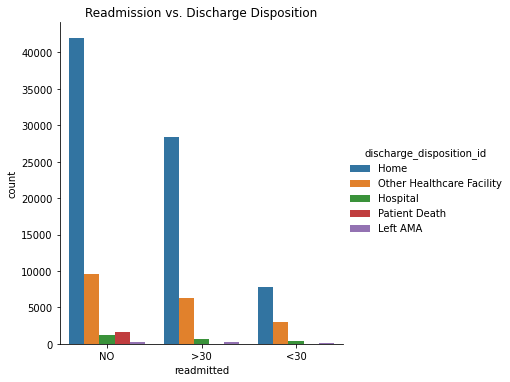

In [126]:
sns.catplot(x='readmitted', hue = 'discharge_disposition_id', data=df, kind = 'count');
plt.title("Readmission vs. Discharge Disposition");

## 5.5 Admission Type vs. Readmission

The bar graph shows each of the readmission categories and then the counts for the admission types within the category.

It is clear that no matter the readmission status of the patient, most patients are admitted to the hospital as an emergency. What is interesting to note is that for those not readmitted, more patients were electively admitted to the hospital rather than admitted to the hospital as an urgent case. This does not hold true for the patients who were readmitted. More of them were urgent cases instead of elective.

Admission Type would be a good feature to use in the modelling of this data set.

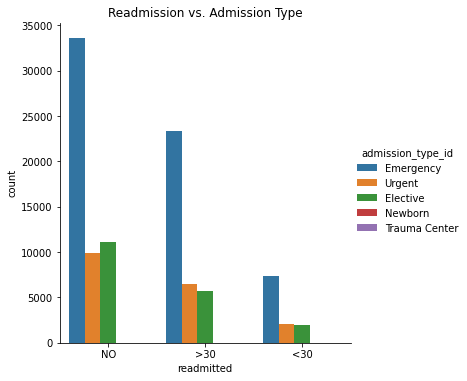

In [129]:
sns.catplot(x='readmitted', hue = 'admission_type_id', data=df, kind = 'count');
plt.title("Readmission vs. Admission Type");

## 5.6 Age vs. Race

The stacked bar graph below shows how age and race relate. The graph shows that a majority of the patients identify as caucasian.

The number of patients ages 50-80 remains constant for those identifying as African American, Hispanic, and Other, while it clearly increases for those identifying as Caucasian.

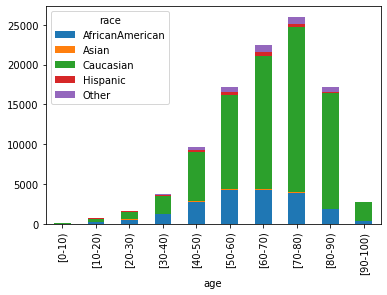

In [125]:
clarity_color_table = pd.crosstab(index=df["age"], columns=df["race"])

clarity_color_table.plot(kind="bar", stacked=True);

## 5.7 Age vs. Gender

The stacked bar graph below shows how age and gender relate. Both the younger and older groups are predominantley female while the middle groups are closer to 50/50 in terms of gender.

It makes sense that the older age group have more females because females have a longer life span. But more females in the younger group is interesting. Is diabetes more prominent in younger females compared to younger males?

I think age and gender will be good features to use for prediction of readmission.

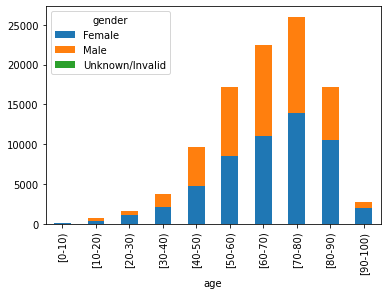

In [121]:
clarity_color_table = pd.crosstab(index=df["age"], columns=df["gender"])

clarity_color_table.plot(kind="bar", stacked=True);

## 5.8 Medicine Change vs. Readmission

The bar graph below shows the three groups for readmission and then counts the number of patients who had their diabetes medicine changed and those who didnt.

For the No readmission category, it is clear that more patients do not have a change in medicine. However, for those readmitted, it is almost even for those patients who have medicine change and those who don't. The margin of difference is even smaller for those readmitted within 30 days. 

Could the change in medication be causing the patients to be readmitted? This feature will be good to look at later during modelling.

I think age and gender will be good features to use for prediction of readmission.

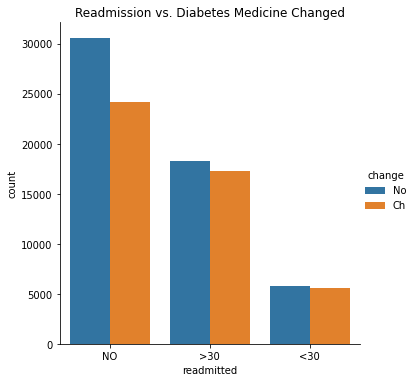

In [127]:
sns.catplot(x='readmitted', hue = 'change', data=df, kind = 'count');
plt.title("Readmission vs. Diabetes Medicine Changed");

# 6.0 Summary

In this notebook we used statistics and visual tools to explore the data set and the relationships between the features. 

Using Pearson coefficients, we saw that the following features had relatively strong correlations:
- time_in_hospital v. num_medications
- num_procedures v. num_medications
- time_in_hospital v. num_lab_procedures
- change v. diabetesMed

From data visualization, we saw that the relationships between the following features had interesting trends in their data:
- num_procedures v. num_medications v. readmission
- age v. discharge_disposition_id
- discharge_disposition_id v. readmission
- admission type v. readmission
- age v. race
- age v. gender
- medicine change v. readmission

The features listed above will be used in the modelling of the data set.

# 7.0 Data Organization

In [130]:
filename = 'diabetic_data_cleaned2'
df.to_csv(filename)